In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

# Fetch Data

In [2]:
dataset = pd.read_csv('2021-22_game_by_game.csv')

In [3]:
dataset.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB_PCT,PACE,PACE_PER40,PIE,POSS,REB_PCT,TM_TOV_PCT,TS_PCT,USG_PCT,GAME_DATE
0,42000406,1610612756,PHX,Phoenix,1628969,Mikal Bridges,Mikal,F,NaN,39.000000:28,...,0.024,102.76,85.63,0.055,84,0.075,0.0,0.444,0.089,2021-07-20
1,42000406,1610612756,PHX,Phoenix,203109,Jae Crowder,Jae,F,NaN,40.000000:33,...,0.053,102.39,85.33,0.140,86,0.169,13.3,0.568,0.165,2021-07-20
2,42000406,1610612756,PHX,Phoenix,1629028,Deandre Ayton,Deandre,C,NaN,36.000000:12,...,0.024,104.11,86.76,0.043,78,0.077,11.8,0.423,0.190,2021-07-20
3,42000406,1610612756,PHX,Phoenix,1626164,Devin Booker,Devin,G,NaN,46.000000:15,...,0.000,102.23,85.19,0.018,98,0.033,17.6,0.407,0.276,2021-07-20
4,42000406,1610612756,PHX,Phoenix,101108,Chris Paul,Chris,G,NaN,39.000000:13,...,0.026,102.81,85.68,0.123,84,0.026,10.7,0.626,0.258,2021-07-20


# EDa

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36860 entries, 0 to 36859
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            36860 non-null  int64  
 1   TEAM_ID            36860 non-null  int64  
 2   TEAM_ABBREVIATION  36860 non-null  object 
 3   TEAM_CITY          36860 non-null  object 
 4   PLAYER_ID          36860 non-null  int64  
 5   PLAYER_NAME        36860 non-null  object 
 6   NICKNAME           36860 non-null  object 
 7   START_POSITION     13630 non-null  object 
 8   COMMENT            7588 non-null   object 
 9   MIN                29272 non-null  object 
 10  FGM                29272 non-null  float64
 11  FGA                29272 non-null  float64
 12  FG_PCT             29272 non-null  float64
 13  FG3M               29272 non-null  float64
 14  FG3A               29272 non-null  float64
 15  FG3_PCT            29272 non-null  float64
 16  FTM                292

In [5]:
dataset.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OFF_RATING,OREB_PCT,PACE,PACE_PER40,PIE,POSS,REB_PCT,TM_TOV_PCT,TS_PCT,USG_PCT
count,3.686000e+04,3.686000e+04,3.686000e+04,29272.000000,29272.000000,29272.000000,29272.000000,29272.000000,29272.000000,29272.000000,...,36860.000000,36860.000000,29272.000000,29272.000000,29272.000000,36860.000000,36860.000000,29272.000000,29272.000000,36860.000000
mean,2.120403e+08,1.610811e+09,1.167889e+06,3.815079,8.235344,0.428196,1.178293,3.248394,0.260143,1.522171,...,84.670830,0.031788,103.395003,86.162451,0.088864,37.630521,0.070144,10.025000,0.528814,0.145529
std,5.849399e+08,6.133752e+05,6.706463e+05,3.179613,5.884624,0.251505,1.483243,3.006200,0.291851,2.175232,...,48.493746,0.057542,88.501947,73.751627,0.162012,27.471117,0.071564,12.678528,0.285133,0.107200
min,1.200000e+07,1.610613e+09,2.544000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,47.010000,39.180000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.200028e+07,1.610613e+09,2.035240e+05,1.000000,4.000000,0.286000,0.000000,1.000000,0.000000,0.000000,...,70.000000,0.000000,97.210000,81.010000,0.036000,8.000000,0.000000,0.000000,0.375000,0.054750
50%,2.200063e+07,1.610613e+09,1.628400e+06,3.000000,7.000000,0.444000,1.000000,3.000000,0.200000,1.000000,...,101.800000,0.000000,101.390000,84.490000,0.090000,41.000000,0.059000,7.700000,0.543000,0.154000
75%,2.200097e+07,1.610613e+09,1.629647e+06,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,...,117.300000,0.048000,105.970000,88.310000,0.142000,61.000000,0.108000,14.800000,0.698000,0.220000
max,2.042000e+09,1.612710e+09,1.630466e+06,21.000000,37.000000,1.000000,12.000000,22.000000,1.000000,19.000000,...,300.000000,1.000000,14405.760000,12004.800000,6.500000,108.000000,1.000000,100.000000,2.273000,1.000000


In [6]:
dataset['GAME_DATE'] = pd.to_datetime(dataset['GAME_DATE'])

In [8]:
from data_loader import calculate_fanduel_fantasy_points

dataset['DFS_VALUE'] = dataset.apply(lambda row: calculate_fanduel_fantasy_points(row), axis=1)
# this column should be called 'FP' or 'FP_FanDuel', DFS Value is confusing as hell
# and why aren't we doing this inside the data loader?
# 42 minutes and counting just for this simple arithmetic operation...yikes! :-(
# turns out part of the problem is that turnovers in this data are labeled 'TO' and not 'TOV'

/Users/yafo/miniconda3/envs/nlp/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


KeyboardInterrupt: 

In [7]:
# replacing the above with vectorized direct calculation which took under 1 second to complete
# might be more complicated with DK and the cats > 10 thing

dataset['FP_fanduel'] = (
    dataset['PTS'] +
    dataset['REB'] * 1.2 +
    dataset['AST'] * 1.5 +
    dataset['STL'] * 3 +
    dataset['BLK'] * 3 -
    dataset['TO'] * 1
).fillna(0)

In [ ]:
!pip install prophet

In [8]:
dataset.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PACE,PACE_PER40,PIE,POSS,REB_PCT,TM_TOV_PCT,TS_PCT,USG_PCT,GAME_DATE,FP_fanduel
0,42000406,1610612756,PHX,Phoenix,1628969,Mikal Bridges,Mikal,F,NaN,39.000000:28,...,102.76,85.63,0.055,84,0.075,0.0,0.444,0.089,2021-07-20,23.2
1,42000406,1610612756,PHX,Phoenix,203109,Jae Crowder,Jae,F,NaN,40.000000:33,...,102.39,85.33,0.140,86,0.169,13.3,0.568,0.165,2021-07-20,43.6
2,42000406,1610612756,PHX,Phoenix,1629028,Deandre Ayton,Deandre,C,NaN,36.000000:12,...,104.11,86.76,0.043,78,0.077,11.8,0.423,0.190,2021-07-20,30.7
3,42000406,1610612756,PHX,Phoenix,1626164,Devin Booker,Devin,G,NaN,46.000000:15,...,102.23,85.19,0.018,98,0.033,17.6,0.407,0.276,2021-07-20,24.1
4,42000406,1610612756,PHX,Phoenix,101108,Chris Paul,Chris,G,NaN,39.000000:13,...,102.81,85.68,0.123,84,0.026,10.7,0.626,0.258,2021-07-20,35.9


In [12]:
dataset.to_csv('2021-22_with_FP.csv')

/Users/yafo/miniconda3/envs/nlp/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yafo/miniconda3/envs/nlp/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yafo/miniconda3/envs/nlp/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yafo/miniconda3/envs/nlp/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 16.22515373160827


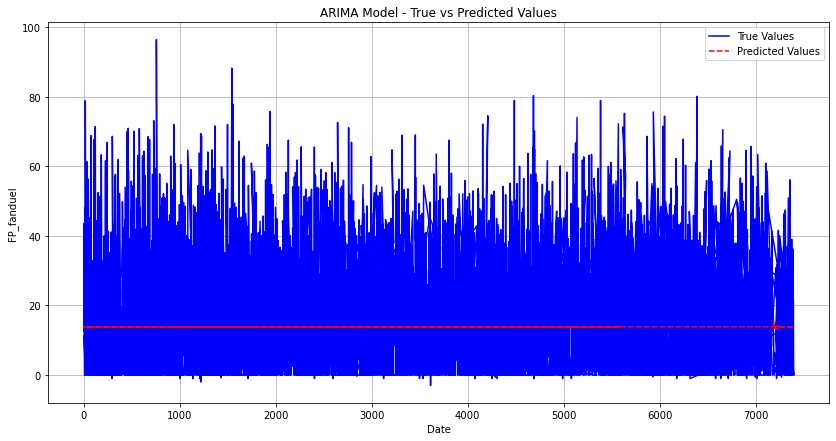

In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Sort the data by game_date
dataset = dataset.sort_values('GAME_DATE')

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(dataset) * 0.8)
train, test = dataset[:train_size], dataset[train_size:]

# Extract the target variable
y_train = train['FP_fanduel']
y_test = test['FP_fanduel']

# Fit an ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse}')

# Plotting the true values and predictions
plt.figure(figsize=(14, 7))
plt.plot(test.index, y_test, label='True Values', color='blue')
plt.plot(test.index, y_pred, label='Predicted Values', color='red', linestyle='--')
plt.title('ARIMA Model - True vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('FP_fanduel')
plt.legend()
plt.grid(True)
plt.show()